# Matplotlib Fundamentals

### Objectives
After this lesson you should be able to ...

1. Be aware of the two independent plotting interfaces for matplotlib - the state-machine environment and the object-oriented interface
1. Plot using the object-oriented interface of matplotlib with **`fig, ax = plt.subplots...`**


### Resources
1. [Matplotlib homepage](http://matplotlib.org)
1. [General Usage Notes](http://matplotlib.org/faq/usage_faq.html) <--- Very highly recommended. Read until 'What is a backend?'

## Introduction
**`Matplotlib`** is a very popular and widely used plotting library in Python and is the default (for now) for most data scientists using Python. It was originally built to mimic the functionality of plotting with Matlab. 

## Two Interfaces
There are two separate ways to interface with matplotlib. One is called the **`state-machine environment`** and the other is with an **object-oriented** approach. The state-machine environment (known as **pyplot** from here on out) is a complex term for saying that matplotlib implicitly handles some of the plotting for you. 

The **object-oriented** approach gives you full control over each element of the plot and is the more Pythonic way of interacting with matplotlib. It is suggested you use the object-oriented approach. Nearly all plotting examples may be reproduced with either approach but the object-oriented approach is explicit and, in my opinion, easier to determine what is happening.

### Using only the object-oriented approach
This notebook only uses the object-oriented approach, as attempting to learn both at the start is not necessary and confusing. Many examples online use pyplot so it is something that you will eventually need to understand. Much of the code between each approach will actually look quite similar.

## Anatomy of a Figure

![](images/fig_ax.png)

There is a hierarchy you must understand when plotting with matplotlib. The highest and outermost part of a plot is the **Figure**. The figure contains all the other plotting elements, and you typically do not interact with it much. Inside the figure is one ore more **Axes**. The Axes is the actual plotting surface that you normally would refer to as a 'plot'. 

A figure may contain any number of these **Axes**. The **Axes** is a container for all of the other physical pixels that get drawn onto your screen. This includes the x and y axis, lines, text, points, legends, images, etc... 

### Axes is a confusing word
The term **Axes** is not actually plural and does not mean more than one axis. It literally stands for a single 'plot'. It's unfortunate that this fundamental element has a name that is so confusing.

### Importing the pyplot module
Importing matplotlib into your workspace is done a little differently than NumPy or Pandas. You rarely will import matplotlib itself directly like this:

```
>>> import matplotlib
```

The above is perfectly valid code, but the matplotlib developers decided not to put all the main functionality in the top level module. 

### The difference between importing Pandas and Matplotlib
When you **`import pandas as pd`**, you get access to nearly all of the available functions and classes of the library. This isn't true with Matplotlib. Instead, much of the functionality for quickly plotting is found in the pyplot module. If you navigate to the matplotlib source directory, found in your site-packages directory, you will see a **`pyplot.py`** file. This is the module that you are importing into your workspace.

![](images/pyplot_dir.png)

Let's import the pyplot module now and alias it to **`plt`**, which is done by convention:

In [1]:
import matplotlib.pyplot as plt

## Embedding plots into Jupyter Notebooks
To use matplotlib in Jupyter Notebook you need to run the magic command **`%matplotlib inline`** before making any plots. This embeds your plots directly into the output of the cells. If you do not, you will have to call the **`show`** method from your figure object, which will produce a plot in a separate window.

In [2]:
%matplotlib inline

### Use pyplot to begin
pyplot does provide lots of useful functions, one of which is to create a Figure and any number of Axes that you desire. You can do this without pyplot, but it is more difficult. It's also quite standard to begin the object-oriented approach by laying out your Figure and Axes first and to then call methods from these objects.

### Use the `subplots` function
The pyplot **`subplots`** function creates a single Figure and any number of Axes. The first two arguments to it are integers that represent the number of rows and columns of Axes that you desire. For instance, the following call to **`subplots`** creates 6 Axes over a 2 by 3 grid.

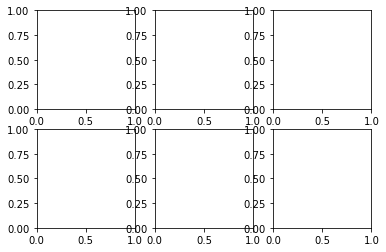

In [3]:
fig, ax_array = plt.subplots(2, 3)

### Why are there two variables on the left-hand side?
You probably noticed that there are two new variables separated by a comma on the left-hand side of the equal statement. Python allows you to return multiple objects back from a function. The **`subplots`** function returns two objects, the Figure, and an array of Axes.

### Quick example of a function returning multiple objects
The following function returns the square and the cube of the passed number. The returned objects are separated by a comma.

In [4]:
def square_cube(x):
    return x ** 2, x ** 3

In [5]:
square_cube(5)

(25, 125)

### Assign the returned values to separate variables - Technically called "Tuple Unpacking"
We can assign the result to two new variables with the following:

In [6]:
a, b = square_cube(5)

In [7]:
a

25

In [8]:
b

125

### Multiple Axes returned as a NumPy array
Whenever you create multiple Axes on a figure with **`subplots`**, you will be returned a NumPy array of Axes objects. Let's verify that the shape of this array is 2 x 3. We will now go back and use **`fig`** and **`ax_array`** from our original call to **`subplots`**.

In [9]:
type(ax_array)

numpy.ndarray

In [10]:
ax_array.shape

(2, 3)

### Distinguishing the Figure from the Axes
It's not obvious, from looking at the plots, which part is the Figure and which are the Axes. We will call our first method, **`set_face_color`** in an object-oriented fashion from the Figure object. We pass it a name of a color (more on colors later). 

In [11]:
fig.set_facecolor('green')

### Where is the figure?
When using the object-oriented approach, you will need to put the Figure variable name to display it in the notebook. This should now hopefully distinguish the Figure (green), from the Axes(white).

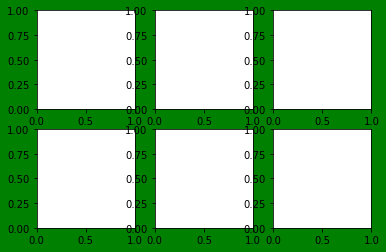

In [12]:
fig

## Set the size of the figure on creation with `figsize`
You can set the Figure to any size you want with the **`figsize`** parameter in the call to **`subplots`**. Set it equal to a 2-item tuple of the size in **inches** you want your plot to be.

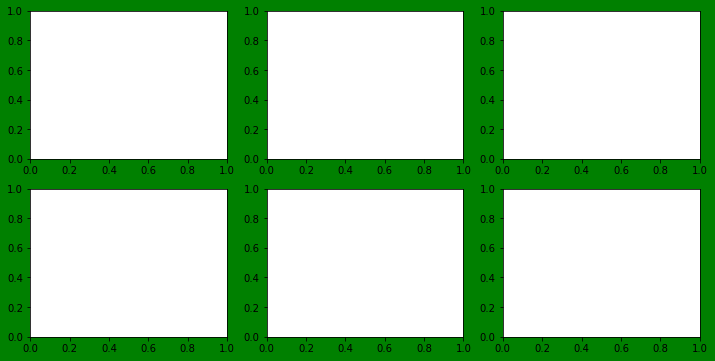

In [13]:
fig, ax_array = plt.subplots(2, 3, figsize=(12, 6))
fig.set_facecolor('green')

### Why is there output this time?
Calls using pyplot will output the figure. Object-oriented method calls will not.

### Selecting each Axes from the NumPy Axes array
**`ax_array`**  is a 2-dimensional NumPy array containing Matplotlib Axes objects. Let's output the contents to the screen.

In [14]:
ax_array

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177ea610>,
      dtype=object)

### Assign each Axes to a separate variable
To ease the ability to make changes to the Axes, we will assign each individual Axes to its own variable.

In [15]:
ax1 = ax_array[0, 0]
ax2 = ax_array[0, 1]
ax3 = ax_array[0, 2]
ax4 = ax_array[1, 0]
ax5 = ax_array[1, 1]
ax6 = ax_array[1, 2]

Verify the type to ensure we have matplotlib Axes objects:

In [16]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

### Outputting the Axes does not show the plot
Only outputting the Figure object will display the plot.

In [17]:
ax1

# Using the object-oriented approach
The object-oriented approach to matplotlib requires us to select individual plotting elements. Once an element is selected we use **dot notation** to change something about the particular element by calling a **method**. 

Every single plotting element may be assigned to a separate variable. The object-oriented approach give you lots of control over your plot.

### Calling our first Axes method
The majority of your method calls when working with matplotlib will come from Axes objects. We use the **`text`** method which takes an x and y coordinate and a string for the text. The **`ha`** parameter stands for **horizontal alignment**. It can be either 'right', 'center', or 'left'.

In [18]:
ax1.text(x=.5, y=.5, s='Axes 1', ha='center')

Text(0.5, 0.5, 'Axes 1')

### Where is the text?
Remember, that only when you output the Figure will you see the Figure.

### Why is there output?
When we add items to our Axes, matplotlib will return an object that references that item. Here, it returned a Text object. We did not assign it to a variable so it was outputted to the screen.

### View the Figure to see the text
Let's verify that our text was placed on an Axes.

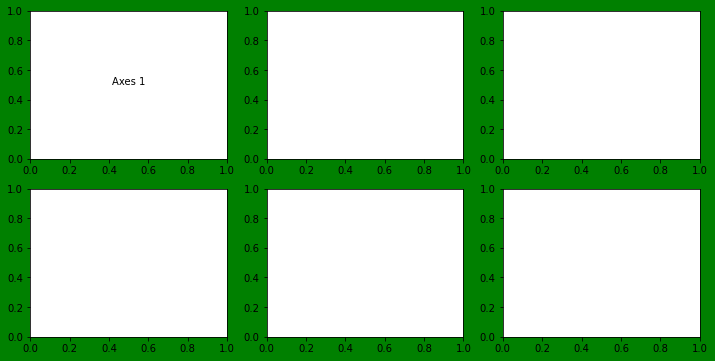

In [19]:
fig

### Identify all the other Axes with text
The first three parameters are `x, y, s` so we don't have to explicitly name them.

In [20]:
ax2.text(.5, .5, 'Axes 2', ha='center')
ax3.text(.5, .5, 'Axes 3', ha='center')
ax4.text(.5, .5, 'Axes 4', ha='center')
ax5.text(.5, .5, 'Axes 5', ha='center')
text6 = ax6.text(.5, .5, 'Axes 6', ha='center', va='center', size=20, color='red')

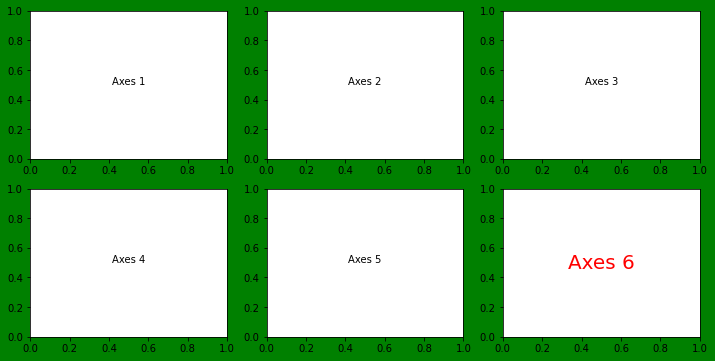

In [21]:
fig

# How to use the `text` Axes method? 
Lots more help exists within the Matplotlib documentation. Let's visit the [Matplotlib home page] and find out how to get help.

## Three ways to get help

* **Find a tutorial** - Click tutorials, then text, then pick an individual tutorial
* **Find an example** - Click examples, then Text, labels, and annotations from the right-hand side menu
* **The API** - Click docs, then scroll down and select text

The API gives you a comprehensive list of all the available parameters for the text method as well as all the attributes and methods.


## Not all parameters visible with shift + tab + tab
Unfortunately, with matplotlib, not all the available parameters will be shown in the docstring. You will have to consult the API.

# Practice creating text
Use the **`text`** method to place text on the any of the Axes. You can also use **`annotate`** method to draw arrows from some text to a point.

[1]: https://matplotlib.org/index.html

In [22]:
# your code here

### The last Text object was saved to a variable
The text plotted on the bottom right Axes was assigned to variable **`text6`**. We can now explore this object with the dot notation. Placing a dot after it and pressing tab reveals all of its functionality.

### `get_` and `set_` methods
Most matplotlib objects have a set of methods that begin with **`get_`** and a matching set that begin with **`set_`**. The **`get_`** methods retrieve a property about the object and the **`set_`** methods assign a new value to a property. These are sometimes called **getter and setter** methods.

Let's retrieve some of the text properties.

In [23]:
text6.get_color()

'red'

In [24]:
text6.get_fontsize()

20.0

In [25]:
text6.get_text()

'Axes 6'

In [26]:
text6.get_horizontalalignment()

'center'

In [27]:
text6.get_visible()

True

### Get all properties
Use the **`properties`** method to unveil all of the properties of a matplotlib object. Warning - there are a lot.

In [28]:
text6.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'bbox_patch': None,
 'children': [],
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x117b755d0>,
 'clip_on': False,
 'clip_path': None,
 'color': 'red',
 'contains': None,
 'figure': <Figure size 864x432 with 6 Axes>,
 'fontfamily': ['sans-serif'],
 'fontname': 'DejaVu Sans',
 'fontproperties': <matplotlib.font_manager.FontProperties at 0x117b6b310>,
 'fontsize': 20.0,
 'fontstyle': 'normal',
 'fontvariant': 'normal',
 'fontweight': 'normal',
 'gid': None,
 'horizontalalignment': 'center',
 'in_layout': True,
 'label': '',
 'path_effects': [],
 'picker': None,
 'position': (0.5, 0.5),
 'prop_tup': (0.5,
  0.5,
  'Axes 6',
  'red',
  'center',
  'center',
  3872722542469884652,
  None,
  None,
  72.0,
  <weakref at 0x117b0a710; to 'RendererAgg' at 0x117953750>,
  1.2),
 'rasterized': None,
 'rotation': 0.0,
 'rotation_mode': None,
 'sketch_params': None,
 'snap': None,
 'stretch': 'normal',
 'text': 'Axes 6',
 'transform

### Setting properties
Let's set some of the properties.

In [29]:
text6.set_color('purple')
text6.set_fontsize(40)
text6.set_horizontalalignment('left')
text6.set_y(.2)

### Output Figure to verify
Again, you must output the Figure to see the changes.

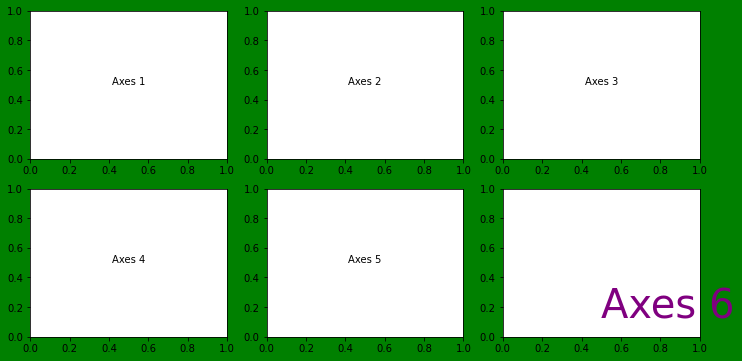

In [30]:
fig

# Practice using the getter and setter methods of Axes, Figure, and text objects

In [ ]:
# your code here

# How to use the `text` Axes method? 
Lots more help exists within the Matplotlib documentation. Let's visit the [Matplotlib home page][1] and find out how to get help.

## Three ways to get help

* **Find a tutorial** - Click tutorials, then text, then pick an individual tutorial
* **Find an example** - Click examples, then Text, labels, and annotations from the right-hand side menu
* **The API** - Click docs, then scroll down and select text

The API gives you a comprehensive list of all the available parameters for the text method as well as all the attributes and methods.


## Not all parameters visible with shift + tab + tab
Unfortunately, with matplotlib, not all the available parameters will be shown in the docstring. You will have to consult the API.

# Practice creating text
Use the **`text`** method to place text on the any of the Axes. You can also use **`annotate`** method to draw arrows from some text to a point.

[1]: https://matplotlib.org/index.html

In [ ]:
# your code here

# Plot vertical and horizontal lines with `vlines` and `hlines`
Read the documentation (using shift + tab + tab) and make some vertical and horizontal lines on some of your Axes.

In [ ]:
# your code here

# Control x and y axis from the Axes directly
Although, you can select the x and y axis objects directly, most of the important getter and setter methods are available from the Axes itself. These methods will start with **`get_x`** or **`get_y`**.

Practice getting and setting these axis properties:

In [ ]:
# your code here